# ****Overview Of Dataset****

**The "Weather in Australia" dataset for rainfall prediction likely contains meteorological data collected from various locations in Australia. Here's a simple overview of what such a dataset might include:**

Features (Columns):
Date:The specific day on which the weather measurements were taken.

Location:The name of the city or area in Australia where the data was recorded.

MinTemp:The lowest temperature recorded on the given day (in degrees Celsius).

MaxTemp:The highest temperature recorded on the given day (in degrees Celsius).

Rainfall:The total amount of rainfall recorded during the day (in millimeters).

Evaporation:The amount of water that evaporated from the surface (in millimeters), measured over 24 hours.

Sunshine:The number of hours of bright sunshine during the day.

WindGustDir:The direction (compass direction like N, S, E, W , etc) of the strongest wind gust recorded during the day.

WindGustSpeed:The speed of the strongest wind gust recorded during the day (in kilometers per hour).

WindDir9am:The direction from which the wind was blowing at 9 AM.

WindDir3pm:The direction from which the wind was blowing at 3 PM.

WindSpeed9am:The wind speed at 9 AM (in kilometers per hour).

WindSpeed3pm:The wind speed at 3 PM (in kilometers per hour).

Humidity9am:The percentage of humidity in the air at 9 AM.

Humidity3pm:The percentage of humidity in the air at 3 PM.

Pressure9am:The atmospheric pressure at 9 AM (in hectopascals).

Pressure3pm:The atmospheric pressure at 3 PM (in hectopascals).

Cloud9am:The fraction of the sky covered by clouds at 9 AM (measured on a scale from 0 to 8, where 0 is clear and 8 is completely overcast).

Cloud3pm:The fraction of the sky covered by clouds at 3 PM (measured on the same scale as above).

Temp9am:The temperature recorded at 9 AM (in degrees Celsius).

Temp3pm:The temperature recorded at 3 PM (in degrees Celsius).

RainToday:Indicates whether it rained during the day (Yes/No).

RISK_MM:The amount of rain (in millimeters) expected tomorrow. This is closely related to RainTomorrow.

RainTomorrow:The target variable you’re predicting: Whether it will rain tomorrow (Yes/No).

### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To display plots inline in Jupyter Notebook
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.decomposition import PCA
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

### **Data Cleaning**

In [2]:
#path_data = r"C:\Users\RTX\Desktop\4th\Data Science\project\weatherAUS.csv"
path_data = r"C:\Data Science tasks\DataScience\weatherAUS.csv"
data = pd.read_csv(path_data)

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [7]:
datav1 = data.copy()

#### 1. Deals with Missing Values

In [8]:
# Calculate and display missing values
missing_values = datav1.isnull().sum()
total_rows = len(datav1)
missing_percent = (missing_values / total_rows) * 100
print("Missing Values Percentage:\n", missing_percent)

Missing Values Percentage:
 Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RISK_MM           0.000000
RainTomorrow      0.000000
dtype: float64


In [9]:
# Fill with mean for temperature-related columns
num_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
            'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm','Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
for col in num_cols:
    if col in datav1.columns:
        datav1.loc[:, col] = datav1[col].fillna(data[col].mean())

In [10]:
# Fill with mode for categorical columns
cat_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
for col in cat_cols:
    if col in datav1.columns:
        datav1.loc[:, col] = datav1[col].fillna(data[col].mode()[0])

In [11]:
print("\nRemaining Missing Values:\n", datav1.isnull().sum())


Remaining Missing Values:
 Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


#### 2. Eliminating all extra variables.

In [12]:
# Drop extra variables
# Columns to drop: 'Date', 'RISK_MM' (data leakage), and potentially sparse or irrelevant ones
columns_to_drop = ['RISK_MM']
cleaned_data = datav1.drop(columns=columns_to_drop)

# Check the resulting dataset
print("Remaining Columns:\n", datav1.columns)

Remaining Columns:
 Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


#### 3. Eliminating duplicates.

In [13]:
print(f"Remaining duplicate rows: {cleaned_data.duplicated().sum()}")

Remaining duplicate rows: 0


#### 4. Detect And Remove Outliers

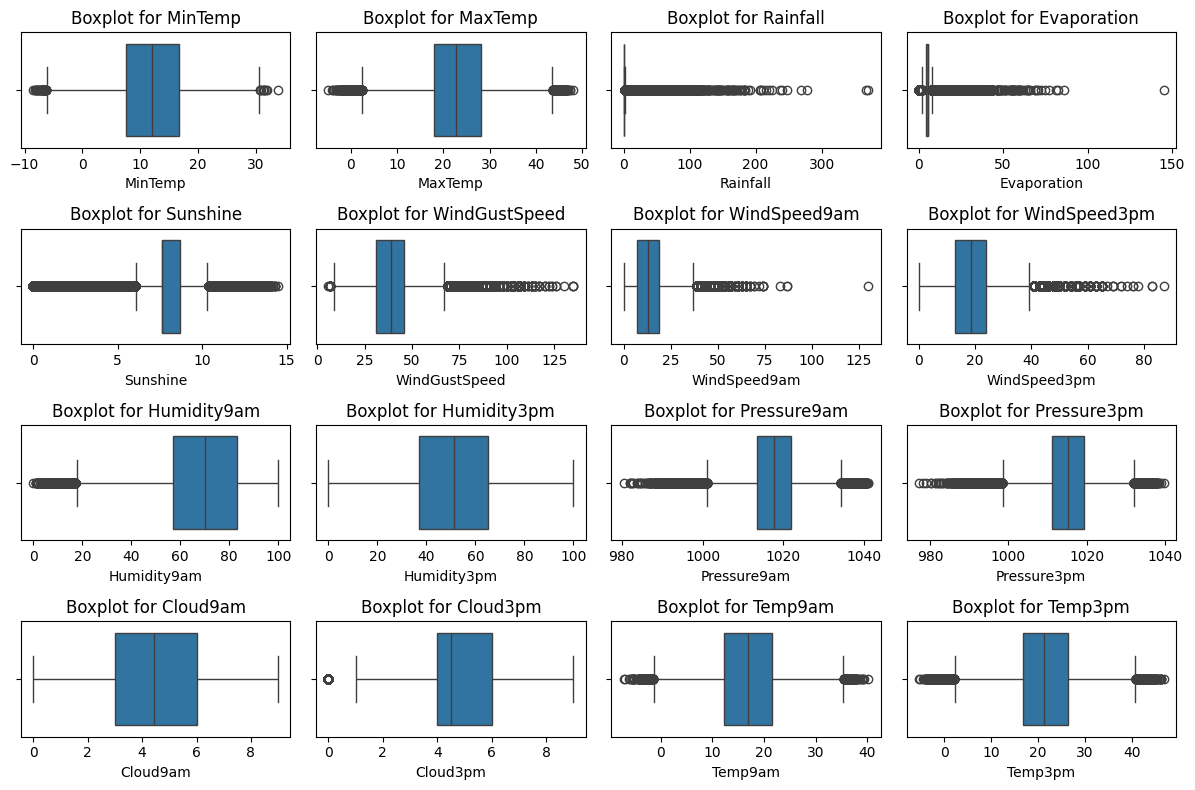

In [14]:
# Create box plots for numerical columns to detect outliers
num_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
            'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm','Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# Plot boxplots for each numerical column before handling outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=cleaned_data[col])
    plt.title(f"Boxplot for {col}")
    
plt.tight_layout()
plt.show()

In [15]:
print(f"Data size before removing outliers: {cleaned_data.shape[0]}")

Data size before removing outliers: 142193


In [16]:
def drop_outliers(df):
    # Defining the value ranges for each column
    column_ranges = {
        'MinTemp': (-10, 30), 
        'MaxTemp': (10, 45), 
        'Rainfall': (0, 240), 
        'Evaporation': (0, 10),
        'Sunshine': (0, 14),
        'WindGustSpeed': (0, 150),
        'WindSpeed9am': (0, 60),
        'WindSpeed3pm': (0, 70),
        'Humidity9am': (30, 90),
        'Humidity3pm': (20, 80),
        'Pressure9am': (1000, 1025),
        'Pressure3pm': (1000, 1025),
        'Cloud9am': (0, 100),
        'Cloud3pm': (0, 100),
        'Temp9am': (10, 30),
        'Temp3pm': (15, 45)
    }
    
    # Iterate over the columns and apply the range filter
    for col, (min_val, max_val) in column_ranges.items():
        if col in df.columns:
            df = df[(df[col] >= min_val) & (df[col] <= max_val)]
    
    return df

In [17]:
cleaned_data_or = drop_outliers(cleaned_data)

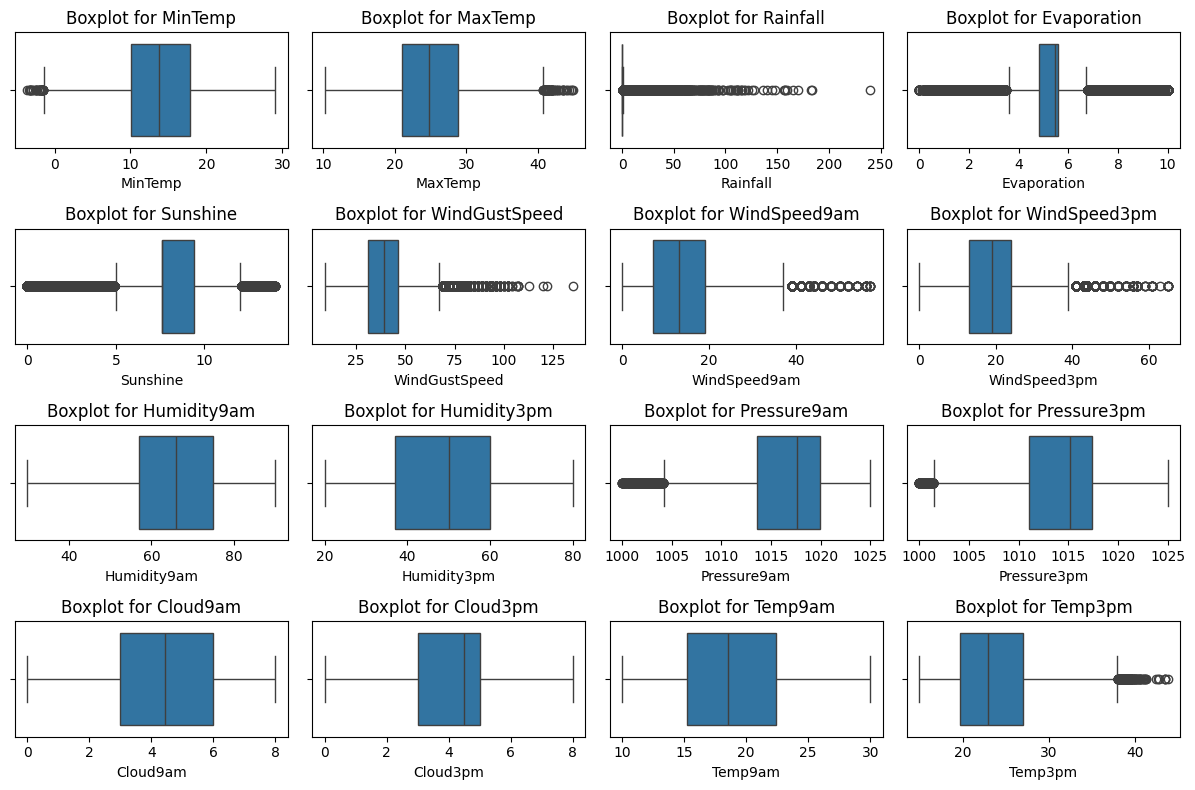

In [18]:
# Create box plots for numerical columns to detect outliers
num_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
            'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm','Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# Plot boxplots for each numerical column after handling outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=cleaned_data_or[col])
    plt.title(f"Boxplot for {col}")
    
plt.tight_layout()
plt.show()

In [19]:
print(f"Data size after removing outliers: {cleaned_data_or.shape[0]}")

Data size after removing outliers: 72831


### **EDA & Preprocessing**

#### 1. Exploring data !

In [20]:
cleaned_data_or.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000
mean,13.926436,25.145822,1.565087,5.365343,8.004989,39.931142,14.089066,19.348591,65.639528,48.784011,1016.581679,1014.104776,4.289687,4.304577,18.985961,23.570073
std,5.316144,5.142822,6.094067,1.702751,2.445723,11.403924,8.377560,8.369614,12.978430,15.002110,4.738815,4.757528,2.178891,2.009574,4.786779,4.903171
min,-3.600000,10.200000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,30.000000,20.000000,1000.000000,1000.000000,0.000000,0.000000,10.000000,15.000000
25%,10.100000,21.000000,0.000000,4.800000,7.624853,31.000000,7.000000,13.000000,57.000000,37.000000,1013.600000,1011.000000,3.000000,3.000000,15.200000,19.700000
50%,13.700000,24.800000,0.000000,5.469824,7.624853,39.000000,13.000000,19.000000,66.000000,50.000000,1017.653758,1015.200000,4.437189,4.503167,18.500000,23.000000
75%,17.800000,28.900000,0.200000,5.600000,9.400000,46.000000,19.000000,24.000000,75.000000,60.000000,1019.900000,1017.400000,6.000000,5.000000,22.400000,27.000000
max,29.100000,44.900000,240.000000,10.000000,14.000000,135.000000,57.000000,65.000000,90.000000,80.000000,1025.000000,1025.000000,8.000000,8.000000,30.000000,43.800000


In [21]:
cleaned_data_or.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [22]:
# Find unique values in categorical columns
categorical_columns = cleaned_data_or.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {cleaned_data[col].nunique()} unique values")

Date: 3436 unique values
Location: 49 unique values
WindGustDir: 16 unique values
WindDir9am: 16 unique values
WindDir3pm: 16 unique values
RainToday: 2 unique values
RainTomorrow: 2 unique values


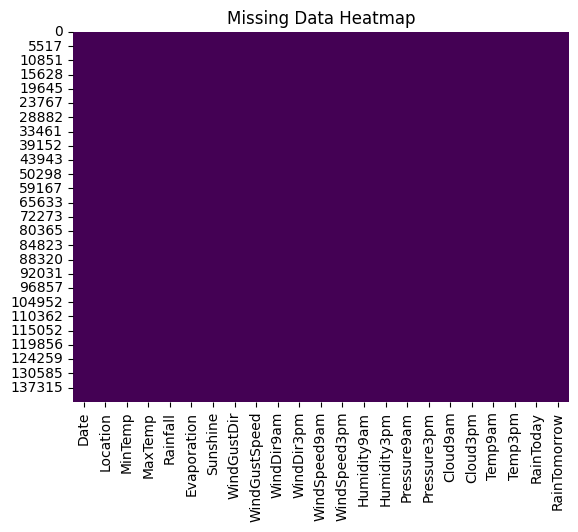

In [24]:
# Visualize missing values
sns.heatmap(cleaned_data_or.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

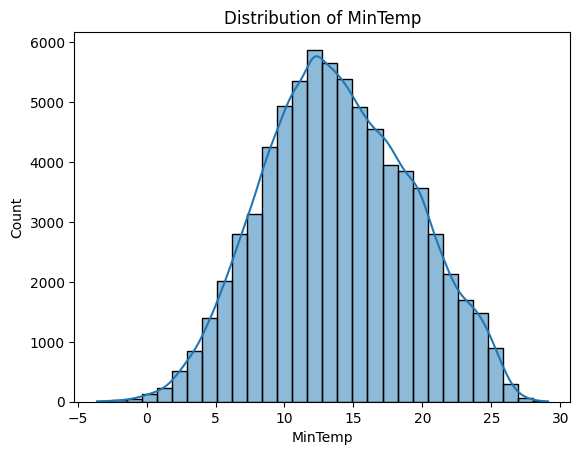

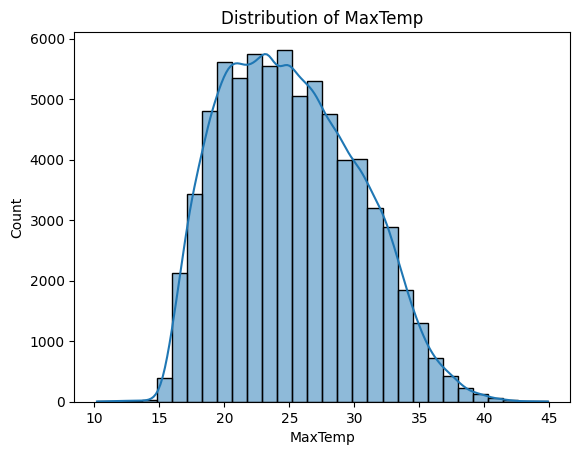

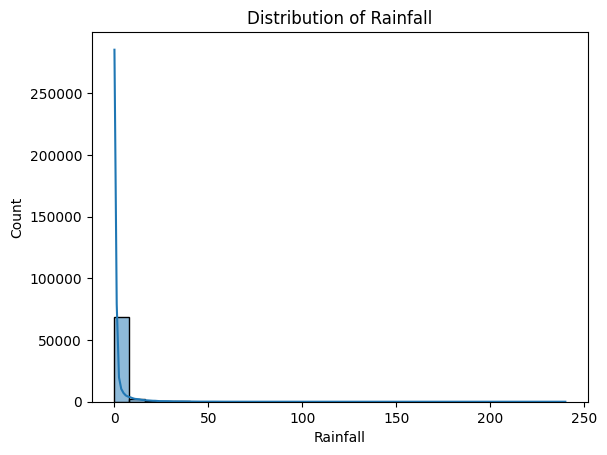

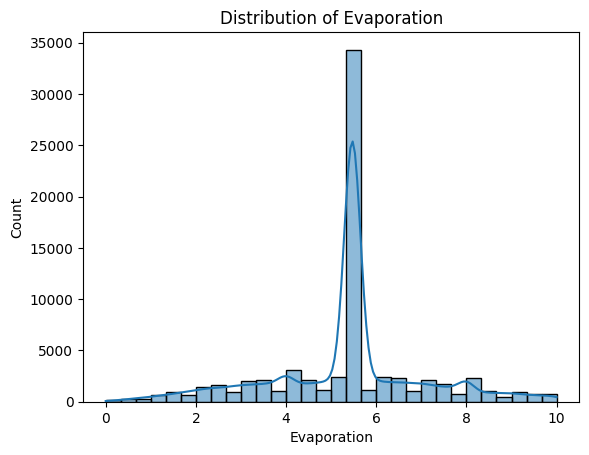

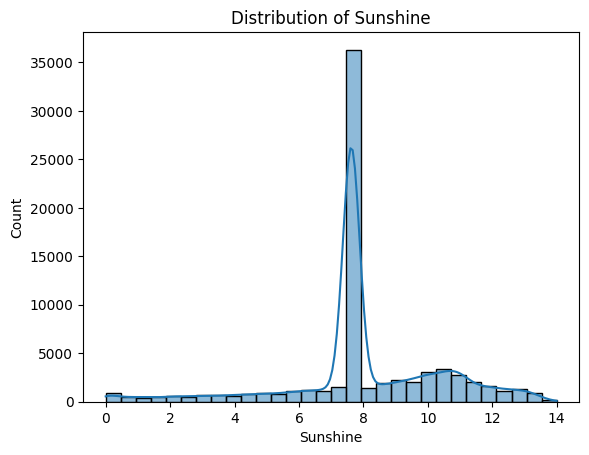

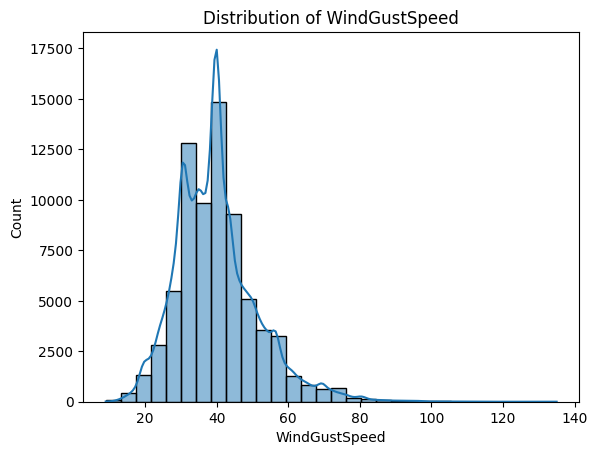

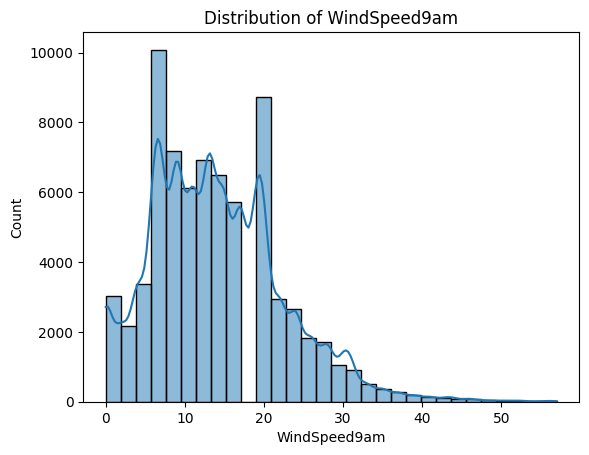

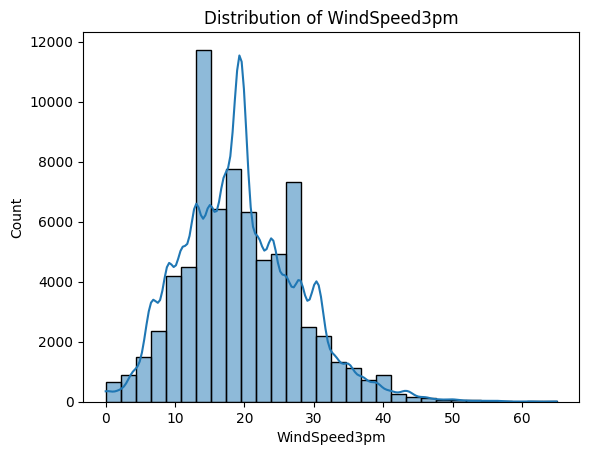

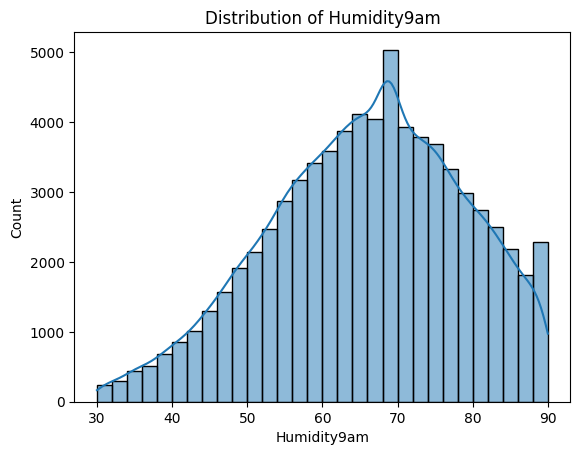

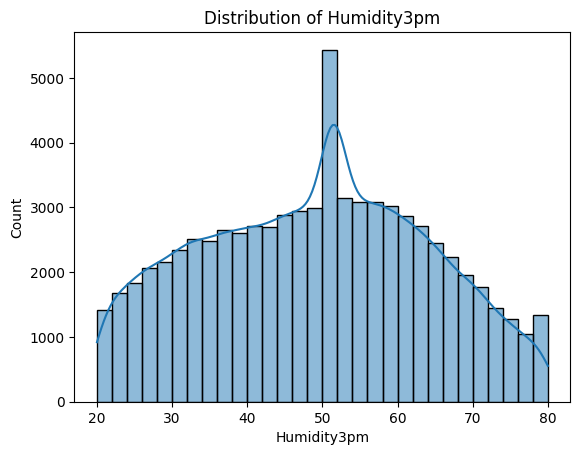

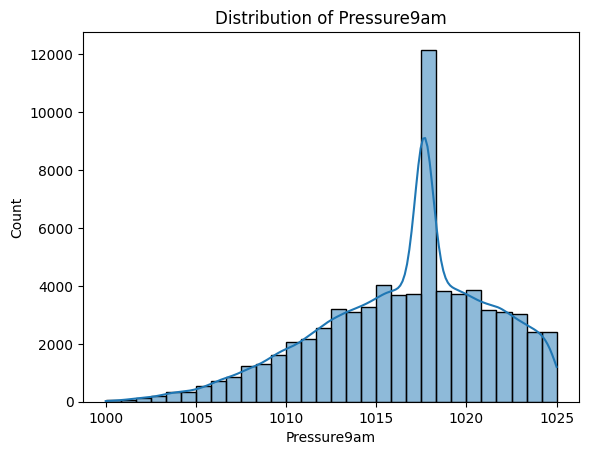

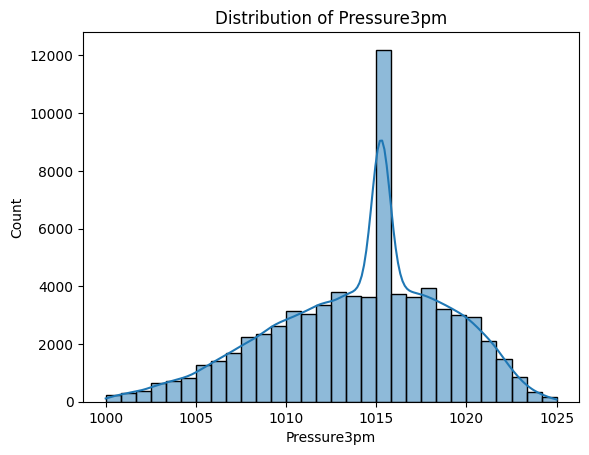

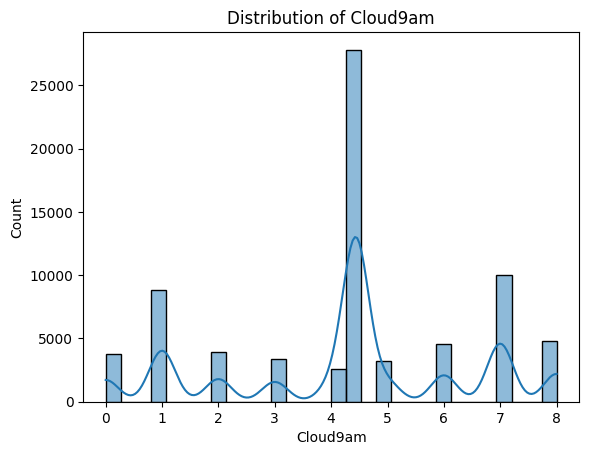

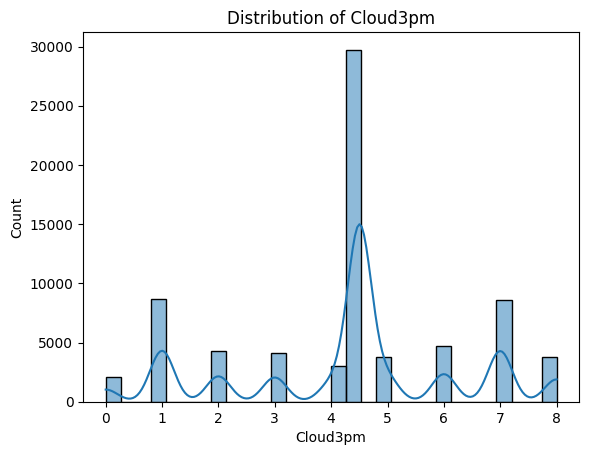

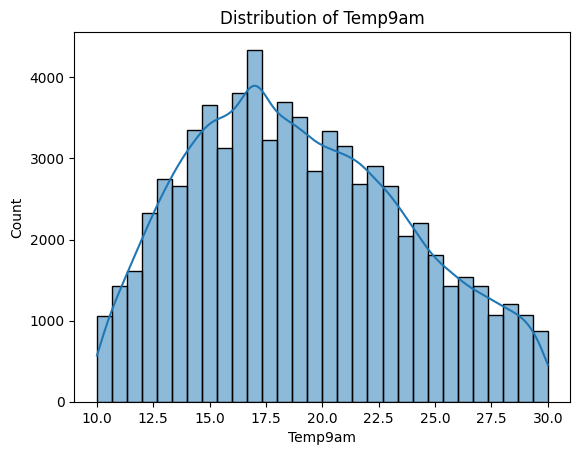

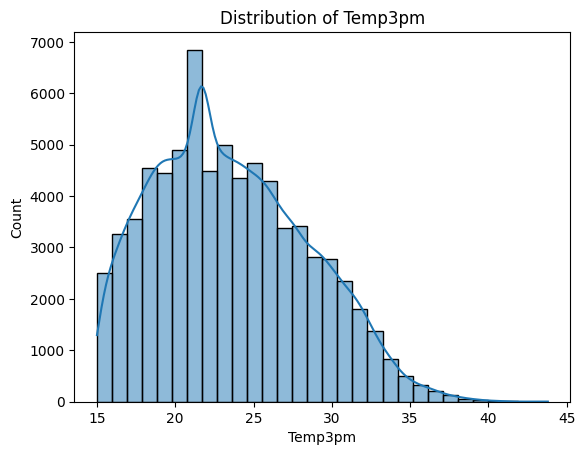

In [25]:
# Distribution of numerical features
numerical_columns = cleaned_data_or.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    sns.histplot(cleaned_data_or[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


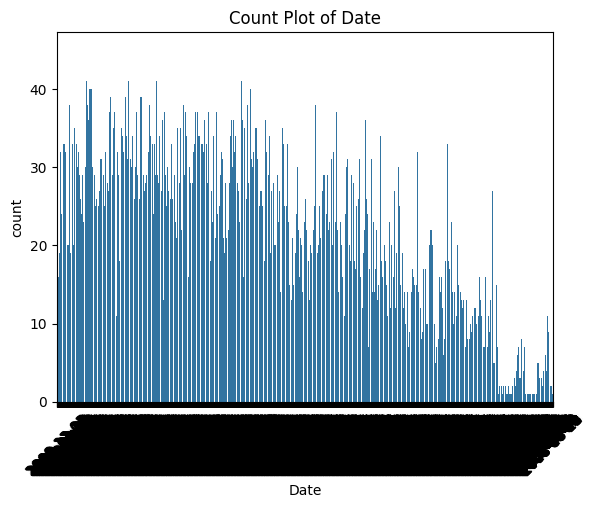

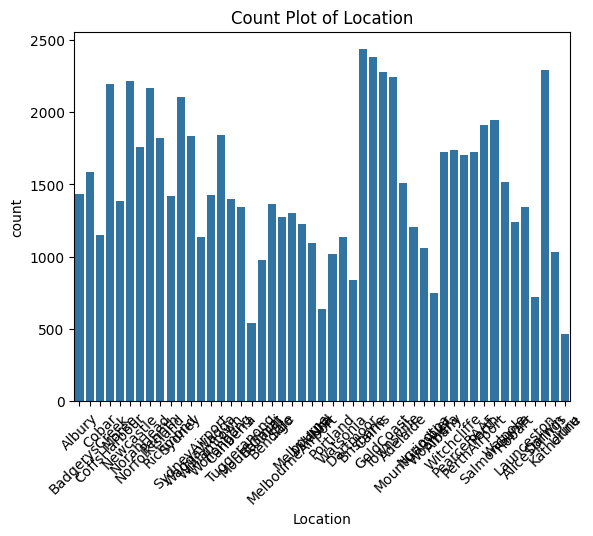

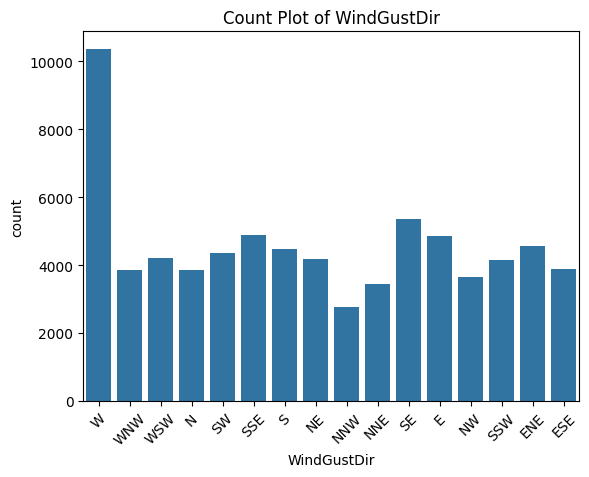

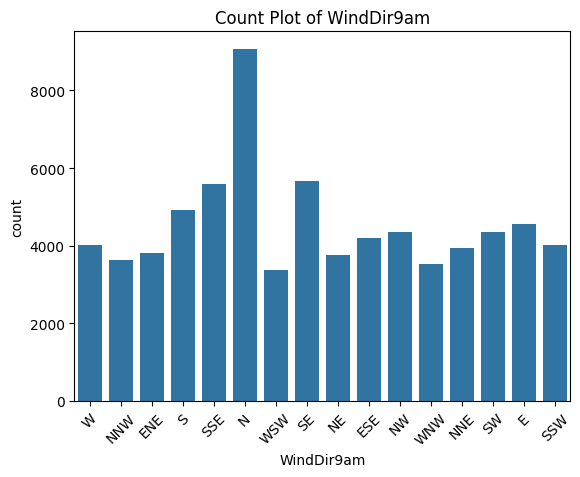

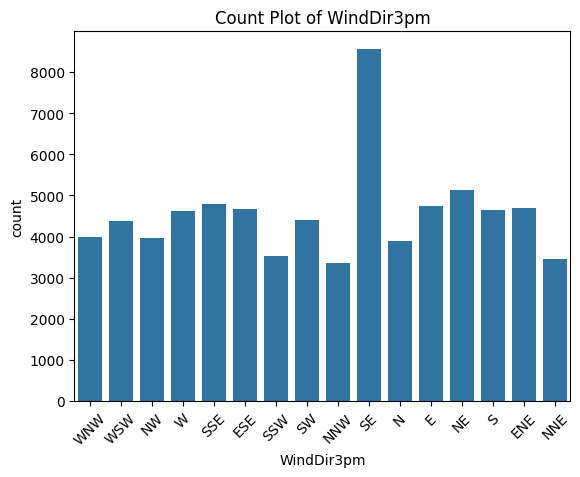

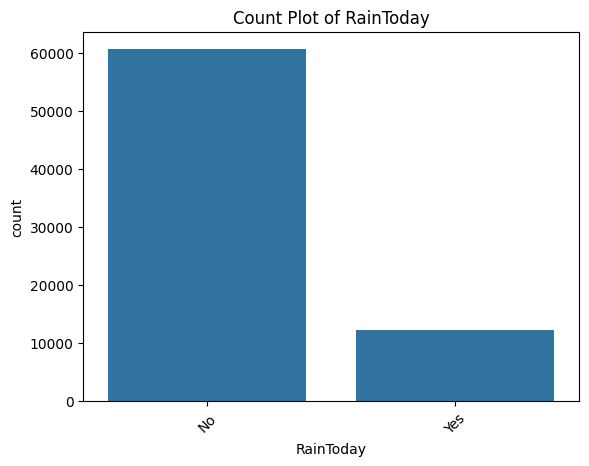

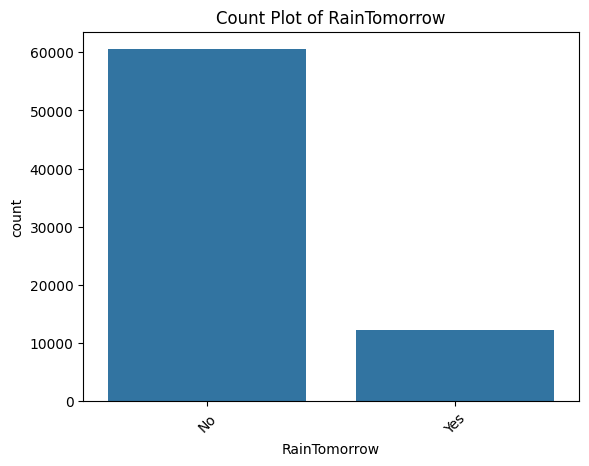

In [26]:
# Count plot for categorical features
for col in categorical_columns:
    sns.countplot(x=cleaned_data_or[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


#### 2. Arranging Data. 

In [27]:
def arrange_data(df):
    # Ensure that 'Date' is in datetime format
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d',errors='coerce')
    
    # Sort data by 'Date'
    df = df.sort_values(by='Date', ascending=True)
    
    return df

In [28]:
data_arranged = arrange_data(cleaned_data_or)

In [29]:
data_arranged.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
44351,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,Yes
44352,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,Yes


#### 3. Grouping data & future engineering.

In [30]:
def group_data(df):
    
    # Select only numeric columns for aggregation
    numeric_cols = df.select_dtypes(include=['number']).columns

    # Group rows by Location and calculate mean for numerical columns
    grouped_by_location = df.groupby('Location')[numeric_cols].mean().reset_index()

    # Aggregate data by year and month for trends
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    grouped_by_month = df.groupby(['Year', 'Month'])[numeric_cols].mean().reset_index()

    # Group columns logically (keeping all columns for inspection)
    temp_related = df[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']]
    rain_related = df[['Rainfall', 'RainToday', 'RainTomorrow']]
    wind_related = df[['WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm']]
    humidity_pressure = df[['Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']]
    cloud_sunshine = df[['Cloud9am', 'Cloud3pm', 'Sunshine']]

    # Return grouped data
    return {
        "grouped_by_location": grouped_by_location,
        "grouped_by_month": grouped_by_month,
        "temperature_related": temp_related,
        "rain_related": rain_related,
        "wind_related": wind_related,
        "humidity_and_pressure": humidity_pressure,
        "cloud_and_sunshine": cloud_sunshine
    }


In [31]:
grouped_data = group_data(data_arranged)

**Display groups into DataFrames**

In [33]:
grouped_data_loc=pd.DataFrame(grouped_data['grouped_by_location'])
grouped_data_loc.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,Adelaide,13.460348,23.788718,1.166148,4.988949,7.922636,36.750992,10.121114,15.906866,59.462959,43.277277,1017.115832,1015.222788,4.437189,4.503167,17.531742,22.446641
1,Albany,13.750885,21.113911,1.565563,4.635115,7.578154,39.984292,12.871125,19.708208,71.902440,61.383598,1016.930304,1014.981604,4.957059,4.407576,17.405045,20.157121


In [34]:
grouped_data_month=pd.DataFrame(grouped_data['grouped_by_month'])
grouped_data_month.head(2)

,Year,Month,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2007,11,12.212500,26.375,1.241667,5.950000,8.195833,40.916667,7.333333,15.083333,69.875000,39.666667,1018.445833,1014.970833,4.250000,4.625,17.466667,25.045833
1,2007,12,12.729167,24.950,2.441667,5.591667,8.791667,40.625000,9.583333,18.083333,68.416667,47.541667,1015.870833,1013.291667,4.791667,4.875,17.362500,23.062500


In [35]:
grouped_data_temp=pd.DataFrame(grouped_data['temperature_related'])
grouped_data_temp.head(2)

,MinTemp,MaxTemp,Temp9am,Temp3pm
44351,8.0,24.3,14.4,23.6
44352,14.0,26.9,17.5,25.7


In [36]:
grouped_data_rain=pd.DataFrame(grouped_data['rain_related'])
grouped_data_rain.head(2)

,Rainfall,RainToday,RainTomorrow
44351,0.0,No,Yes
44352,3.6,Yes,Yes


In [37]:
grouped_data_wind=pd.DataFrame(grouped_data['wind_related'])
grouped_data_wind.head(2)

,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm
44351,NW,30.0,SW,NW,6.0,20.0
44352,ENE,39.0,E,W,4.0,17.0


In [38]:
grouped_data_hum_pre=pd.DataFrame(grouped_data['humidity_and_pressure'])
grouped_data_hum_pre.head(2)

,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm
44351,68.0,29.0,1019.7,1015.0
44352,80.0,36.0,1012.4,1008.4


In [39]:
grouped_data_cloud_sun=pd.DataFrame(grouped_data['cloud_and_sunshine'])
grouped_data_cloud_sun.head(2)

,Cloud9am,Cloud3pm,Sunshine
44351,7.0,7.0,6.3
44352,5.0,3.0,9.7


#### 4. Scaling and Normalization.

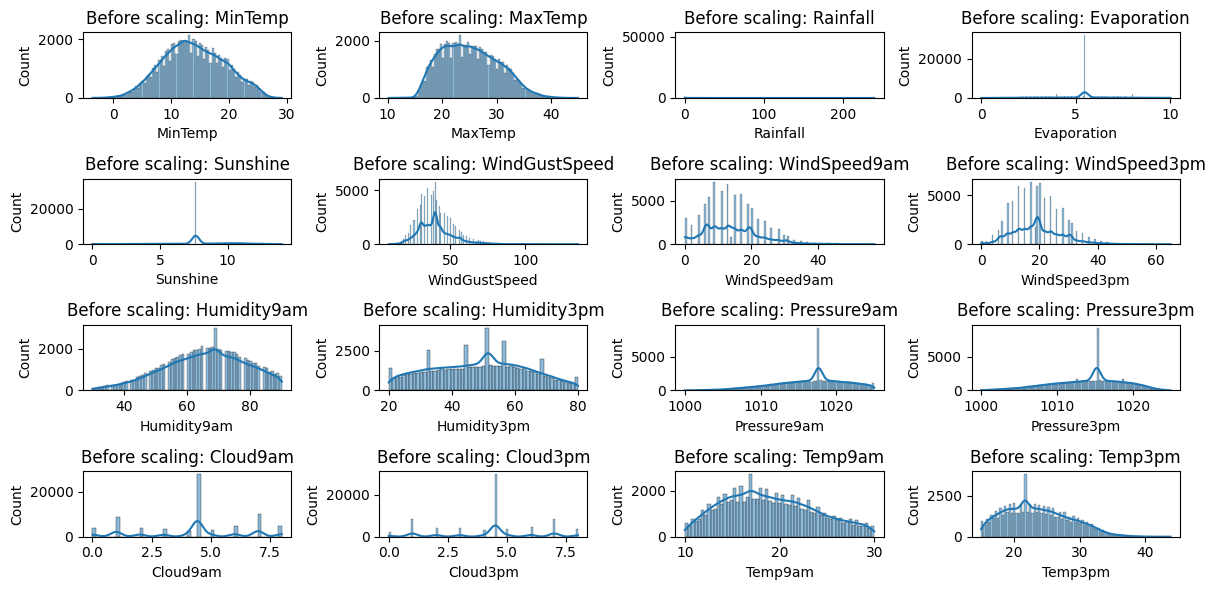

In [40]:
# Before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data_arranged[col], kde=True)
    plt.title(f"Before scaling: {col}")

plt.tight_layout()
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical columns to scale and normalize
num_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
            'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm','Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# Standardize (Z-score) scaling
scaler = StandardScaler()
data_arranged[num_cols] = scaler.fit_transform(data_arranged[num_cols])

# Verify scaling by checking the summary statistics
data_arranged[num_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,7.283100e+04,7.283100e+04,7.283100e+04,7.283100e+04,7.283100e+04,7.283100e+04,7.283100e+04,7.283100e+04,7.283100e+04,7.283100e+04,7.283100e+04,7.283100e+04,7.283100e+04,7.283100e+04,7.283100e+04,7.283100e+04
mean,3.574616e-16,-1.186335e-16,-1.346335e-17,3.121935e-17,7.297524e-17,-1.416578e-15,-7.687766e-17,3.910224e-16,-6.548259e-16,-6.790209e-17,-3.362324e-14,-1.031019e-14,-6.134603e-16,-2.552182e-16,-2.185355e-16,-3.121935e-16
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-3.296855e+00,-2.906172e+00,-2.568233e-01,-3.151006e+00,-3.273078e+00,-2.712343e+00,-1.681774e+00,-2.311782e+00,-2.746077e+00,-1.918677e+00,-3.499143e+00,-2.964748e+00,-1.968761e+00,-2.142049e+00,-1.877259e+00,-1.747876e+00
25%,-7.197816e-01,-8.061432e-01,-2.568233e-01,-3.320197e-01,-1.554299e-01,-7.831693e-01,-8.462028e-01,-7.585338e-01,-6.656882e-01,-7.854956e-01,-6.292078e-01,-6.526073e-01,-5.919045e-01,-6.491853e-01,-7.909258e-01,-7.893055e-01
50%,-4.259437e-02,-6.724414e-02,-2.568233e-01,6.136065e-02,-1.554299e-01,-8.165161e-02,-1.299989e-01,-4.164988e-02,2.777489e-02,8.105509e-02,2.262352e-01,2.302103e-01,6.769668e-02,9.882250e-02,-1.015222e-01,-1.162671e-01
75%,7.286466e-01,7.299890e-01,-2.240042e-01,1.378114e-01,5.703919e-01,5.321764e-01,5.862050e-01,5.557534e-01,7.212380e-01,7.476326e-01,7.002475e-01,6.926385e-01,7.849520e-01,3.460572e-01,7.132276e-01,6.995372e-01
max,2.854262e+00,3.841143e+00,3.912601e+01,2.721883e+00,2.451239e+00,8.336561e+00,5.122163e+00,5.454460e+00,1.877010e+00,2.080788e+00,1.776473e+00,2.290118e+00,1.702856e+00,1.838921e+00,2.300945e+00,4.125915e+00


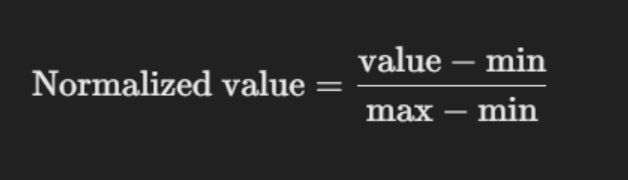

In [42]:
# Min-Max normalization
normalizer = MinMaxScaler()
data_arranged[num_cols] = normalizer.fit_transform(data_arranged[num_cols])

# Verify scaling by checking the summary statistics
data_arranged[num_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000,72831.000000
mean,0.535977,0.430715,0.006521,0.536534,0.571785,0.245485,0.247177,0.297671,0.593992,0.479734,0.663267,0.564191,0.536211,0.538072,0.449298,0.297572
std,0.162573,0.148208,0.025392,0.170275,0.174695,0.090507,0.146975,0.128763,0.216307,0.250035,0.189553,0.190301,0.272361,0.251197,0.239339,0.170249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.418960,0.311239,0.000000,0.480000,0.544632,0.174603,0.122807,0.200000,0.450000,0.283333,0.544000,0.440000,0.375000,0.375000,0.260000,0.163194
50%,0.529052,0.420749,0.000000,0.546982,0.544632,0.238095,0.228070,0.292308,0.600000,0.500000,0.706150,0.608000,0.554649,0.562896,0.425000,0.277778
75%,0.654434,0.538905,0.000833,0.560000,0.671429,0.293651,0.333333,0.369231,0.750000,0.666667,0.796000,0.696000,0.750000,0.625000,0.620000,0.416667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


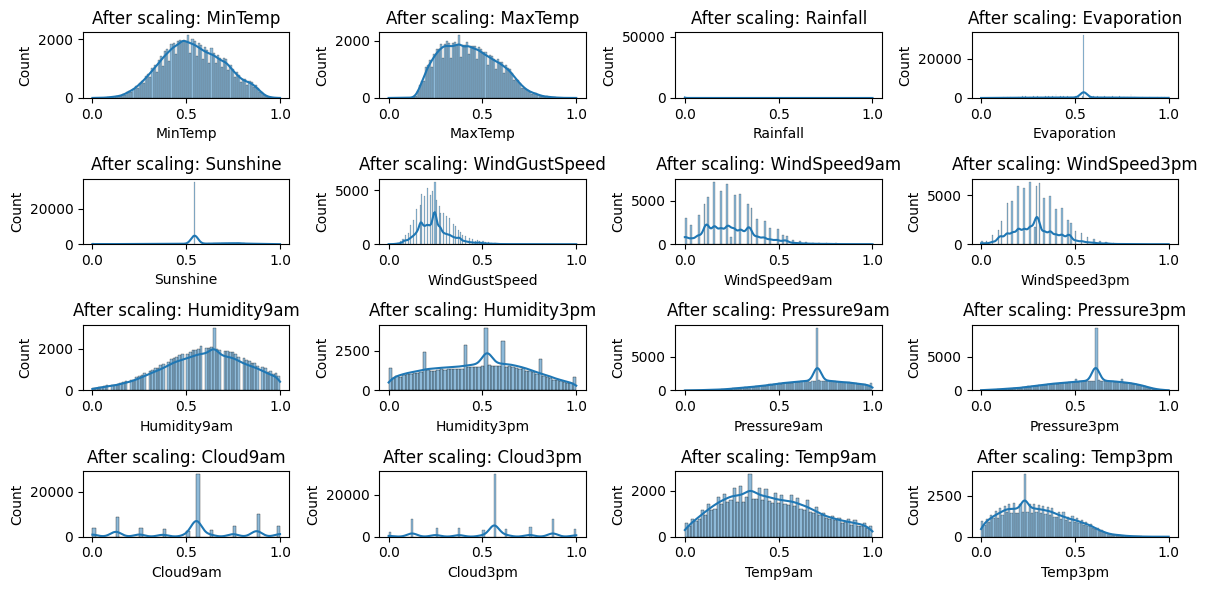

In [44]:
# After scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data_arranged[col], kde=True)
    plt.title(f"After scaling: {col}")

plt.tight_layout()
plt.show()

### 5. Dealing with Inconsistent Data Entry.

In [43]:
import pandas as pd

# Define the function to standardize text columns
def standardize_text_columns(df, columns):
    # Create a copy of the original dataframe to compare changes later
    df_original = df.copy()
    
    for col in columns:
        # Strip extra spaces
        df[col] = df[col].str.strip()

        # Convert to lowercase
        df[col] = df[col].str.lower()

        # Replace common placeholders with NaN
        df[col] = df[col].replace(['?', 'na', 'n/a', 'none'], pd.NA)
    
    # Compare original and cleaned data for the specified columns
    rows_affected = (df[columns] != df_original[columns]).any(axis=1).sum()
    print(f"Number of rows affected: {rows_affected}")
    
    return df

In [45]:
text_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
data_str = standardize_text_columns(data_arranged, text_cols)

Number of rows affected: 72831


In [46]:
data_str['WindGustDir'].value_counts()

WindGustDir
w      10362
se      5366
sse     4890
e       4854
ene     4565
s       4469
sw      4347
wsw     4214
ne      4173
ssw     4139
ese     3883
n       3857
wnw     3857
nw      3648
nne     3441
nnw     2766
Name: count, dtype: int64

In [47]:
data_str['WindDir9am'].value_counts()

WindDir9am
n      9067
se     5667
sse    5595
s      4910
e      4573
sw     4360
nw     4359
ese    4201
w      4019
ssw    4012
nne    3950
ene    3815
ne     3773
nnw    3623
wnw    3536
wsw    3371
Name: count, dtype: int64

In [48]:
data_str['WindDir3pm'].value_counts()

WindDir3pm
se     8559
ne     5129
sse    4797
e      4737
ene    4706
ese    4672
s      4643
w      4622
sw     4409
wsw    4370
wnw    3996
nw     3970
n      3882
ssw    3519
nne    3455
nnw    3365
Name: count, dtype: int64

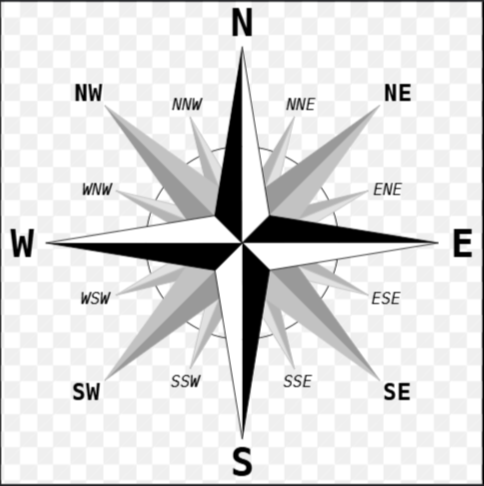
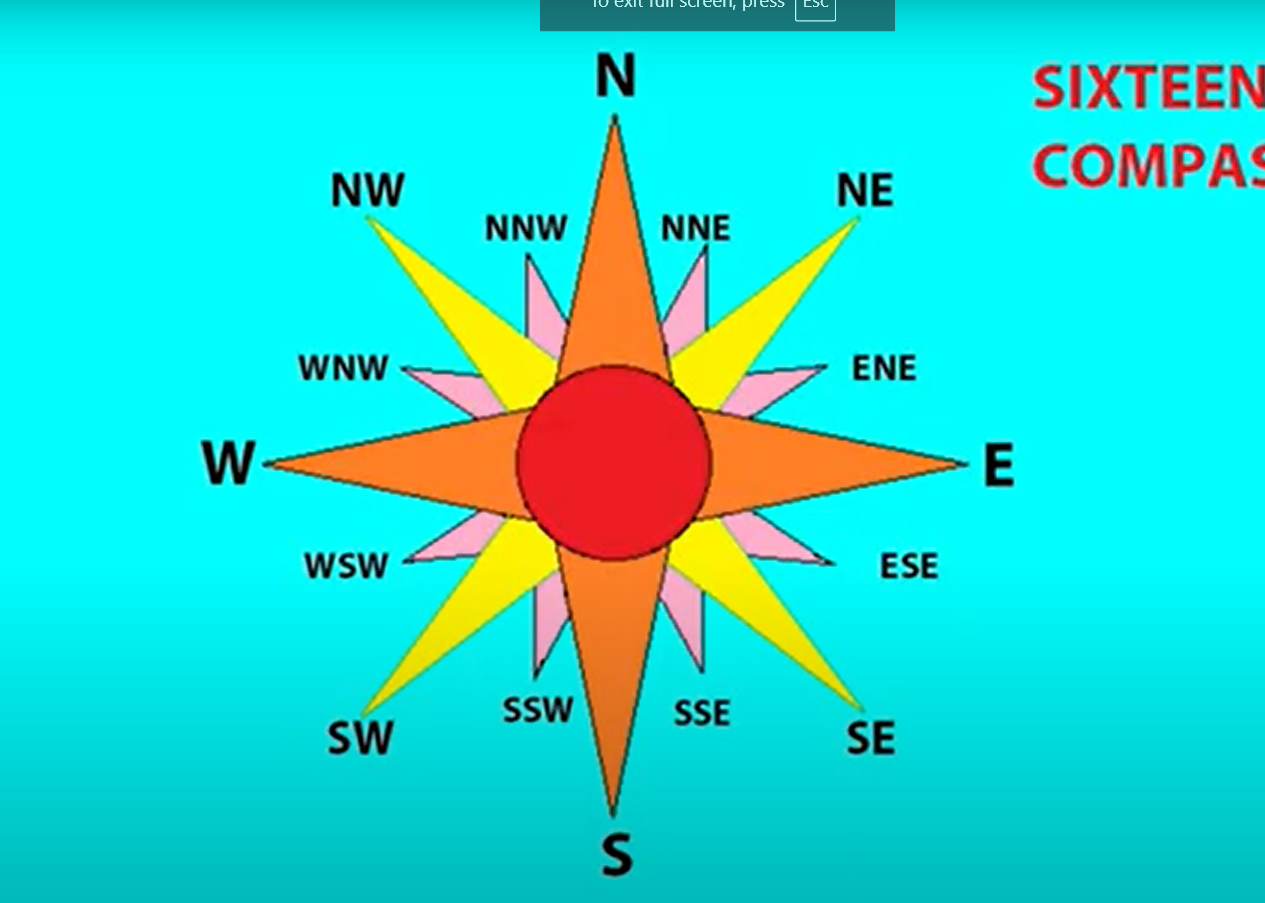

### 6. Rename Directions.

In [49]:
wind_dir_mapping = {
    'n': 'north',
    's': 'south',
    'e': 'east',
    'w': 'west',
    'ne': 'northeast',
    'se': 'southeast',
    'sw': 'southwest',
    'nw': 'northwest',
    'nne': 'north-northeast',
    'ene': 'east-northeast',
    'ese': 'east-southeast',
    'sse': 'south-southeast',
    'ssw': 'south-southwest',
    'wsw': 'west-southwest',
    'wnw': 'west-northwest',
    'nnw': 'north-northwest'
}

In [50]:
def standardize_wind_directions(df, columns, mapping):
    for col in columns:
        # Convert to lowercase
        df[col] = df[col].str.lower()
        # Map to standardized names
        df[col] = df[col].map(mapping)
    return df

In [51]:
# Apply standardization to the relevant columns
wind_columns = ['WindGustDir', 'WindDir9am','WindDir3pm']
data_str = standardize_wind_directions(data_str, wind_columns, wind_dir_mapping)

In [52]:
# Convert Yes/No to 1/0 or lowercase for consistency
data_str['RainToday'] = data_str['RainToday'].map({'yes': 1, 'no': 0}).astype('Int64')
data_str['RainTomorrow'] = data_str['RainTomorrow'].map({'yes': 1, 'no': 0}).astype('Int64')


In [53]:
data1=data_str.copy()

In [54]:
data1.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
44351,2007-11-01,canberra,0.354740,0.406340,0.000,0.34,0.450000,northwest,0.166667,southwest,...,0.788,0.600,0.875,0.875,0.220,0.298611,0,1,2007,11
44352,2007-11-02,canberra,0.538226,0.481268,0.015,0.44,0.692857,east-northeast,0.238095,east,...,0.496,0.336,0.625,0.375,0.375,0.371528,1,1,2007,11


In [55]:
# Identify categorical and numerical columns
categorical_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Location']
numerical_cols = data1.select_dtypes(include=['float64', 'int64']).columns

# Apply Label Encoding to categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data1[col] = le.fit_transform(data1[col])
    label_encoders[col] = le  # Save encoder for potential inverse transformations

In [56]:
data1.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
44351,2007-11-01,9,0.354740,0.406340,0.000,0.34,0.450000,7,0.166667,12,...,0.788,0.600,0.875,0.875,0.220,0.298611,0,1,2007,11
44352,2007-11-02,9,0.538226,0.481268,0.015,0.44,0.692857,1,0.238095,0,...,0.496,0.336,0.625,0.375,0.375,0.371528,1,1,2007,11
44353,2007-11-03,9,0.529052,0.380403,0.015,0.58,0.235714,7,0.603175,3,...,0.380,0.288,1.000,0.875,0.270,0.180556,1,1,2007,11


In [57]:
data1.dtypes

Date             datetime64[ns]
Location                  int32
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir               int32
WindGustSpeed           float64
WindDir9am                int32
WindDir3pm                int32
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                 Int64
RainTomorrow              Int64
Year                      int32
Month                     int32
dtype: object

In [58]:
data1=data1.drop('Date', axis=1)


**The data is imbalanced, so we will use SMOTE to oversampling**

In [59]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.impute import SimpleImputer
X = data1.drop('RainTomorrow', axis=1)
y = data1['RainTomorrow']
smote = SMOTE(random_state=42)
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

X_balanced, y_balanced = smote.fit_resample(X_imputed, y)

In [60]:
print('Original dataset shape:', Counter(y))
print('Balanced dataset shape:', Counter(y_balanced))

Original dataset shape: Counter({0: 60513, 1: 12318})
Balanced dataset shape: Counter({1: 60513, 0: 60513})


In [61]:

data_v2 = pd.concat([pd.DataFrame(X_balanced, columns=X.columns), pd.Series(y_balanced, name='RainTomorrow')], axis=1)

In [62]:
data_v2.dtypes

Location         float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
Year             float64
Month            float64
RainTomorrow       Int64
dtype: object

In [63]:
cols_to_int = ['Location', 'WindGustDir',
    'WindDir9am', 'WindDir3pm','RainToday']

data_v2[cols_to_int] = data_v2[cols_to_int].astype('int32')

In [64]:
cols_to_int2 = ['Year', 'Month']

data_v2[cols_to_int2] = data_v2[cols_to_int2].astype('int64')

In [65]:
data_v2.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
Year               int64
Month              int64
RainTomorrow       Int64
dtype: object

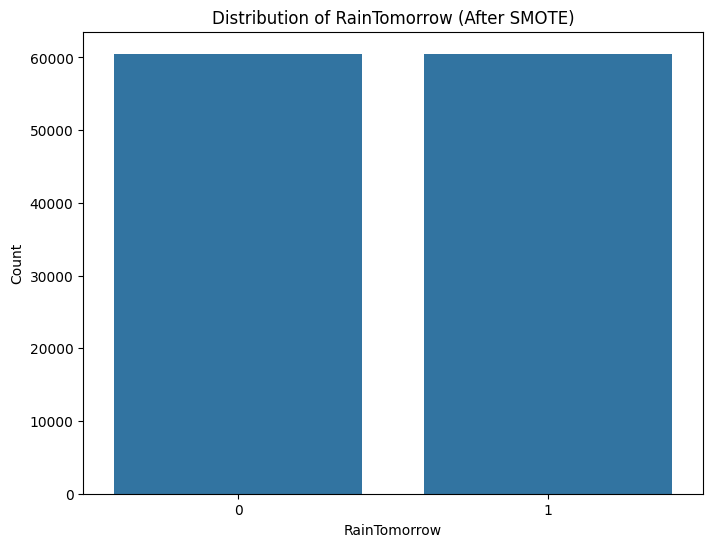

In [66]:
plt.figure(figsize=(8, 6))
sns.countplot(x='RainTomorrow', data=data_v2)
plt.title('Distribution of RainTomorrow (After SMOTE)')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.show()

In [67]:
data_v2.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
RainTomorrow     0
dtype: int64

In [68]:
data_v2.duplicated().sum()

27

In [69]:
data_v2.drop_duplicates(inplace=True)
data_v2.duplicated().sum()

0

### **Part 4. Exploratory data analysis:**

#### How is one variable related to the other ? 

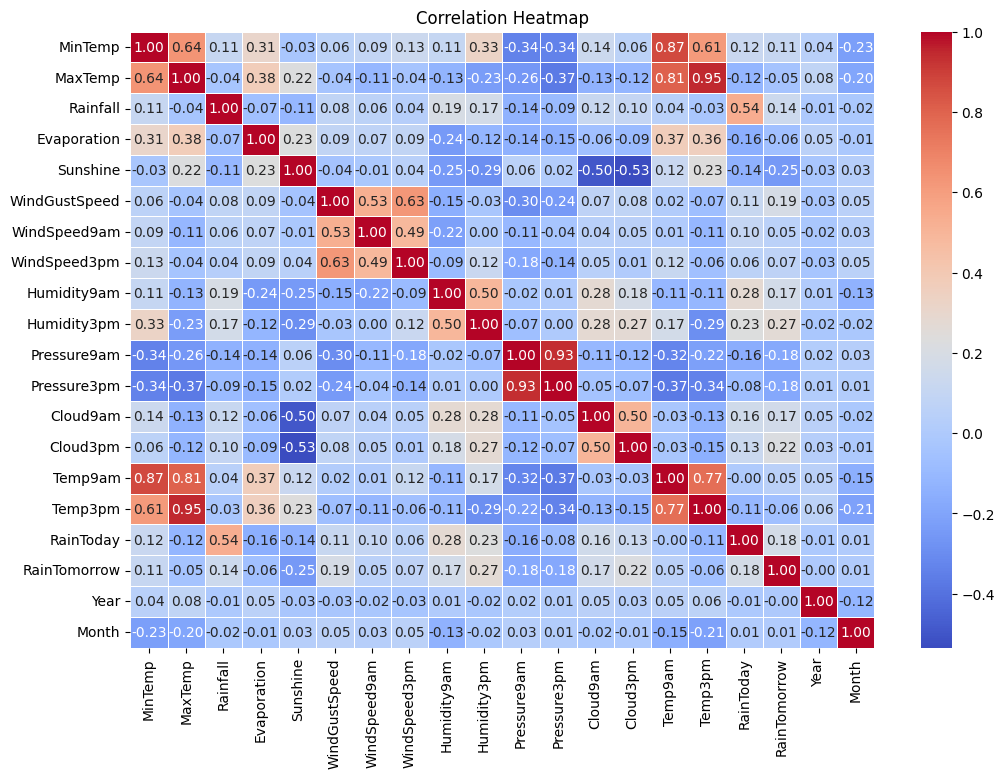

In [57]:
# Select numeric columns only
numeric_columns = data_str.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


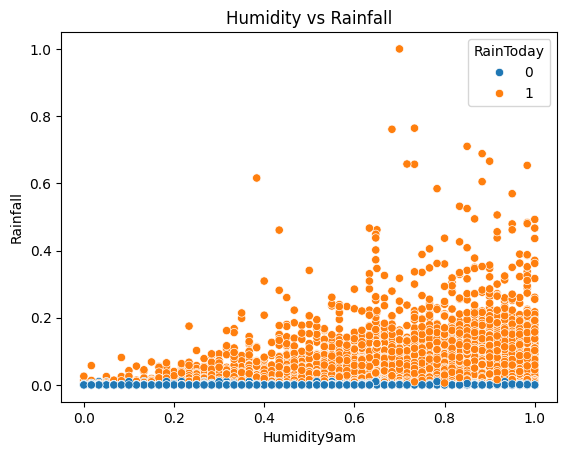

In [58]:
sns.scatterplot(data=data_str, x='Humidity9am', y='Rainfall', hue='RainToday')
plt.title("Humidity vs Rainfall")
plt.show()


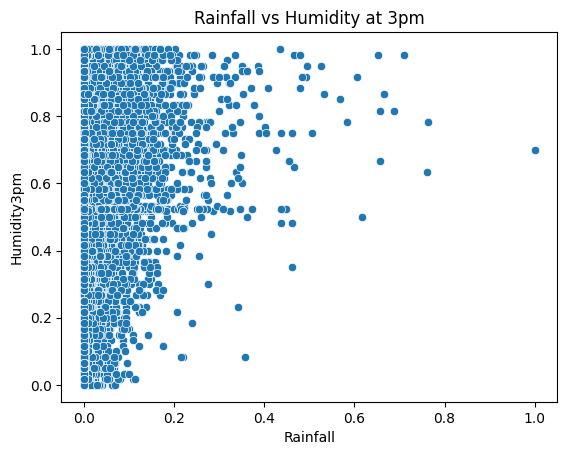

In [59]:
sns.scatterplot(data=data_str, x='Rainfall', y='Humidity3pm')
plt.title('Rainfall vs Humidity at 3pm')
plt.show()


In [60]:
correlation = data_str['Rainfall'].corr(data_str['Humidity3pm'])
print(f"Correlation between Rainfall and Humidity3pm: {correlation}")


Correlation between Rainfall and Humidity3pm: 0.16935252553216876


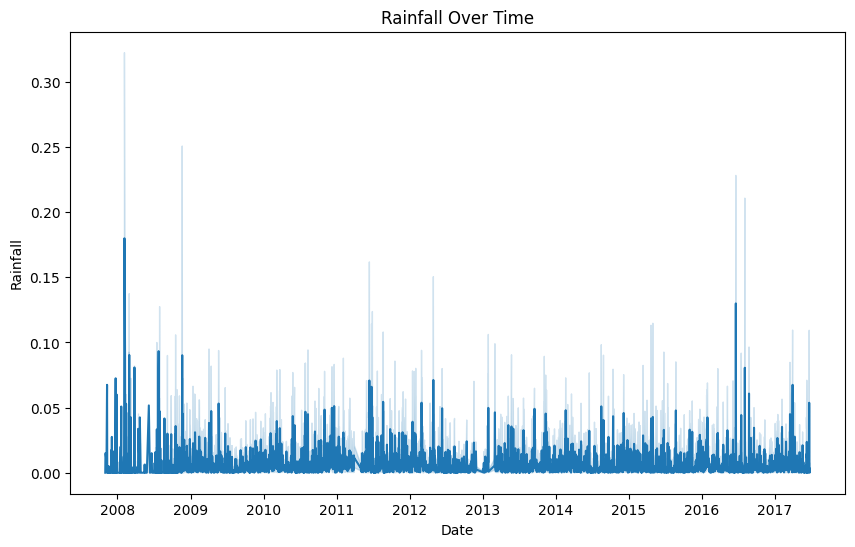

In [61]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_str, x='Date', y='Rainfall')
plt.title('Rainfall Over Time')
plt.show()


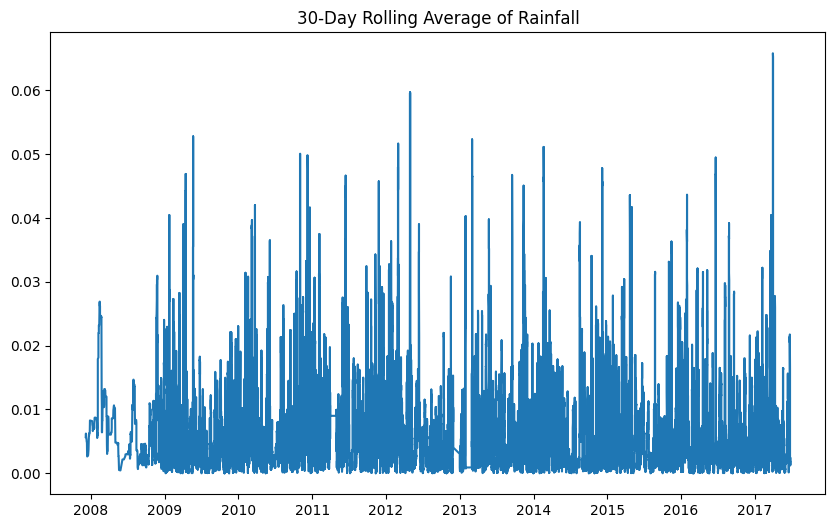

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(data_str['Date'], data_str['Rainfall'].rolling(window=30).mean())
plt.title('30-Day Rolling Average of Rainfall')
plt.show()


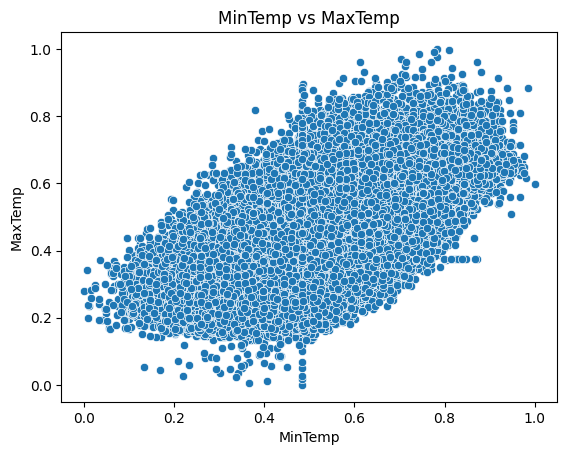

In [63]:
sns.scatterplot(data=data_str, x='MinTemp', y='MaxTemp')
plt.title('MinTemp vs MaxTemp')
plt.show()


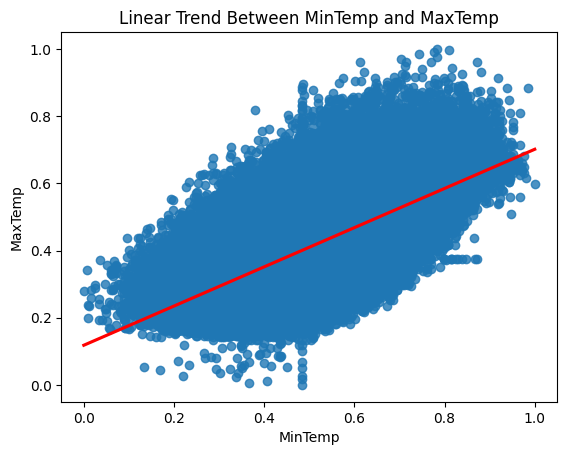

In [64]:
sns.regplot(data=data_str, x='MinTemp', y='MaxTemp', line_kws={"color": "red"})
plt.title('Linear Trend Between MinTemp and MaxTemp')
plt.show()


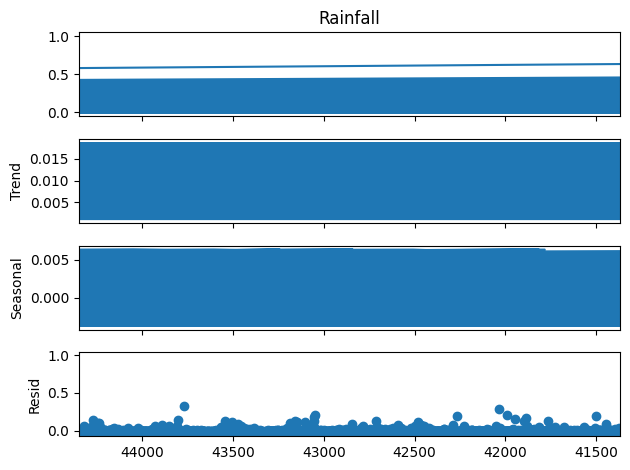

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(data_str['Rainfall'], model='additive', period=365)
decomposition.plot()
plt.show()


In [66]:
data_str.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
44351,2007-11-01,canberra,0.354740,0.406340,0.000000,0.34,0.450000,northwest,0.166667,southwest,...,0.788,0.600,0.875,0.875,0.220,0.298611,0,1,2007,11
44352,2007-11-02,canberra,0.538226,0.481268,0.015000,0.44,0.692857,east-northeast,0.238095,east,...,0.496,0.336,0.625,0.375,0.375,0.371528,1,1,2007,11
44353,2007-11-03,canberra,0.529052,0.380403,0.015000,0.58,0.235714,northwest,0.603175,north,...,0.380,0.288,1.000,0.875,0.270,0.180556,1,1,2007,11
44355,2007-11-05,canberra,0.342508,0.170029,0.011667,0.56,0.757143,south-southeast,0.325397,south-southeast,...,0.732,0.740,0.875,0.875,0.055,0.013889,1,0,2007,11
44357,2007-11-07,canberra,0.296636,0.230548,0.000833,0.42,0.600000,southeast,0.269841,southeast,...,0.984,0.888,0.500,0.750,0.120,0.079861,0,0,2007,11


In [67]:
data_str.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month'],
      dtype='object')

### **Part 6. Build model (ML)**

In [101]:
data_v2.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,RainTomorrow
0,9,0.354740,0.406340,0.000000,0.34,0.450000,7,0.166667,12,7,...,0.788,0.600,0.875,0.875,0.220,0.298611,0,2007,11,1
1,9,0.538226,0.481268,0.015000,0.44,0.692857,1,0.238095,0,13,...,0.496,0.336,0.625,0.375,0.375,0.371528,1,2007,11,1
2,9,0.529052,0.380403,0.015000,0.58,0.235714,7,0.603175,3,4,...,0.380,0.288,1.000,0.875,0.270,0.180556,1,2007,11,1
3,9,0.342508,0.170029,0.011667,0.56,0.757143,9,0.325397,9,2,...,0.732,0.740,0.875,0.875,0.055,0.013889,1,2007,11,0
4,9,0.296636,0.230548,0.000833,0.42,0.600000,11,0.269841,11,2,...,0.984,0.888,0.500,0.750,0.120,0.079861,0,2007,11,0


In [102]:
# Features and target
x = data_v2.drop(columns=['RainTomorrow','Year','Month'])
y = data_v2['RainTomorrow']

In [103]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [104]:
x_train.head(1)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
21470,38,0.370031,0.190202,0.0,0.32,0.221429,8,0.357143,7,8,...,0.461538,0.533333,0.866667,0.952,0.908,0.25,0.875,0.165,0.045139,0


In [105]:
# Step 3: Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [88]:
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100,random_state=42)),
    ("Support Vector Machine", SVC(probability=True,random_state=42)),
    
]

In [89]:
# Create results list to store accuracies for comparison
results_no_pca = []

for name, model in models:
    print(f"Training {name} model without PCA...")
    
    # Wrap the fitting process with tqdm to show progress
    model.fit(x_train_scaled, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(x_test_scaled)[:, 1])

    results_no_pca.append({
        "Model": name,
        "Accuracy (No PCA)": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": auc,
    })

Training Logistic Regression model without PCA...
Training Random Forest model without PCA...
Training Support Vector Machine model without PCA...


In [92]:
results_no_pca = pd.DataFrame(results_no_pca)
results_no_pca

,Model,Accuracy (No PCA),Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.841079,0.598468,0.219238,0.320915,0.803909
1,Random Forest,0.850003,0.681075,0.233667,0.347956,0.833009
2,Support Vector Machine,0.846502,0.695324,0.184770,0.291957,0.777716


In [385]:
# Step 5: Apply PCA and Train Models Again
pca = PCA(n_components=10)  # Reduce dimensions to 10 components
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

results_with_pca = []

for name, model in models:
    print(f"Training {name} model with PCA...")
    
    # Wrap the fitting process with tqdm to show progress
    model.fit(x_train_pca, y_train)
    
    # Predict and evaluate
    y_pred_pca = model.predict(x_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    precision_pca = precision_score(y_test, y_pred_pca)
    recall_pca = recall_score(y_test, y_pred_pca)
    f1_pca = f1_score(y_test, y_pred_pca)
    auc_pca = roc_auc_score(y_test, model.predict_proba(x_test_pca)[:, 1])

    results_with_pca.append({
        "Model": name,
        "Accuracy (With PCA)": accuracy_pca,
        "Precision": precision_pca,
        "Recall": recall_pca,
        "F1 Score": f1_pca,
        "ROC AUC": auc_pca,
    })


Training Logistic Regression model with PCA...
Training Random Forest model with PCA...
Training Support Vector Machine model with PCA...


In [389]:
results_with_pca = pd.DataFrame(results_with_pca)
results_with_pca

,Model,Accuracy (With PCA),Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.835038,0.565714,0.158717,0.247887,0.770865
1,Random Forest,0.838745,0.597333,0.179559,0.276117,0.785631
2,Support Vector Machine,0.837303,0.652812,0.107014,0.183884,0.716913


In [404]:
results_no_pca = pd.DataFrame(results_no_pca)
results_no_pca

,Model,Accuracy (No PCA),Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.841079,0.598468,0.219238,0.320915,0.803897
1,Random Forest,0.850690,0.682648,0.239679,0.354791,0.831233
2,Support Vector Machine,0.846502,0.695324,0.184770,0.291957,0.777716


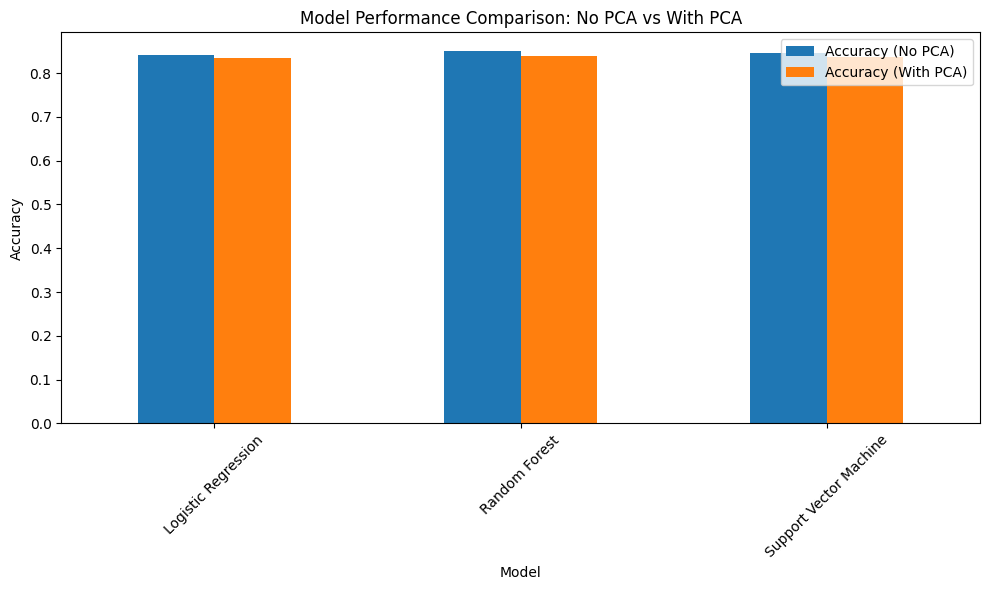

In [402]:
# Step 6: Visualize Results
final_comparison[['Accuracy (No PCA)', 'Accuracy (With PCA)']].plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison: No PCA vs With PCA")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [84]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score
# Initialize and train the model
classifier = DecisionTreeClassifier(criterion='entropy',random_state=42)
classifier.fit(x_train, y_train)

# Make predictions
y_pred = classifier.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7878767076268277
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.88      0.87     12072
         1.0       0.38      0.36      0.37      2495

    accuracy                           0.79     14567
   macro avg       0.62      0.62      0.62     14567
weighted avg       0.78      0.79      0.79     14567



In [110]:
from sklearn.linear_model import LogisticRegression

# Model training
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)

# Predictions
y_pred = log_reg.predict(x_test)

# Evaluation
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, log_reg.predict_proba(x_test)[:, 1]):.2f}")


Logistic Regression Metrics:
Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1-Score: 0.74
ROC-AUC: 0.82


In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    }
    
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")
    return metrics


In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define scoring metric
scorer = make_scorer(f1_score)  # F1-Score is often good for imbalanced datasets


In [115]:
from xgboost import XGBClassifier

# Define hyperparameters
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1.0]
}

# Grid search
grid_xgb = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                        param_grid_xgb, scoring='f1', cv=5)
grid_xgb.fit(x_train, y_train)

# Evaluate on the test set
print("XGBoost Metrics:")
evaluate_model(grid_xgb.best_estimator_, x_test, y_test)


XGBoost Metrics:
Accuracy: 0.91
Precision: 0.94
Recall: 0.88
F1-Score: 0.91
ROC-AUC: 0.97


{'Accuracy': 0.9146280991735537,
 'Precision': 0.9442071785552022,
 'Recall': 0.8773959300852825,
 'F1-Score': 0.9095763305322129,
 'ROC-AUC': 0.971044132872974}

In [116]:
from sklearn.neighbors import KNeighborsClassifier

# Define hyperparameters
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Grid search
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='f1', cv=5)
grid_knn.fit(x_train, y_train)

# Evaluate on the test set
print("KNN Metrics:")
evaluate_model(grid_knn.best_estimator_, x_test, y_test)


KNN Metrics:
Accuracy: 0.85
Precision: 0.80
Recall: 0.94
F1-Score: 0.86
ROC-AUC: 0.92


{'Accuracy': 0.8535537190082645,
 'Precision': 0.7968805895399586,
 'Recall': 0.9404711644009119,
 'F1-Score': 0.8627420604182804,
 'ROC-AUC': 0.9223010385991288}

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define hyperparameters
param_grid_gb = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinking
    'max_depth': [3, 5, 7]  # Depth of the trees
}

# Grid search
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, scoring='f1', cv=5)
grid_gb.fit(x_train, y_train)

# Evaluate on the test set
print("Gradient Boosting Metrics:")
evaluate_model(grid_gb.best_estimator_, x_test, y_test)


In [106]:
from xgboost import XGBClassifier

# Model training
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(x_train, y_train)

# Predictions
y_pred = xgb.predict(x_test)

# Evaluation
print("XGBoost Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, xgb.predict_proba(x_test)[:, 1]):.2f}")


XGBoost Metrics:
Accuracy: 0.91
Precision: 0.94
Recall: 0.87
F1-Score: 0.90
ROC-AUC: 0.97


In [107]:
from sklearn.svm import SVC

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Model training
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm.predict(X_test_scaled)

# Evaluation
print("SVM Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")


SVM Metrics:
Accuracy: 0.83
Precision: 0.81
Recall: 0.84
F1-Score: 0.83


In [108]:
from sklearn.neural_network import MLPClassifier

# Model training
mlp = MLPClassifier(random_state=42, max_iter=500)
mlp.fit(X_train_scaled, y_train)

# Predictions
y_pred = mlp.predict(X_test_scaled)

# Evaluation
print("Neural Network Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")


Neural Network Metrics:
Accuracy: 0.83
Precision: 0.81
Recall: 0.84
F1-Score: 0.82


In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the ANN
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predictions and evaluation
ann_pred = (ann_model.predict(x_test) > 0.5).astype(int).flatten()
print("ANN Accuracy:", accuracy_score(y_test, ann_pred))
print(classification_report(y_test, ann_pred))


ValueError: Invalid dtype: Int64

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Data Preparation
# Exclude categorical columns for regression
df_clustering = data_str.select_dtypes(include=['float64', 'int64']).copy()

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)

# Define the number of clusters (e.g., 2 for RainTomorrow: Yes/No)
n_clusters = len(data_str['RainTomorrow'].unique())


In [42]:
# Step 2: Clustering Model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_clustering['Cluster'] = kmeans.fit_predict(scaled_data)

c:\Users\RTX\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


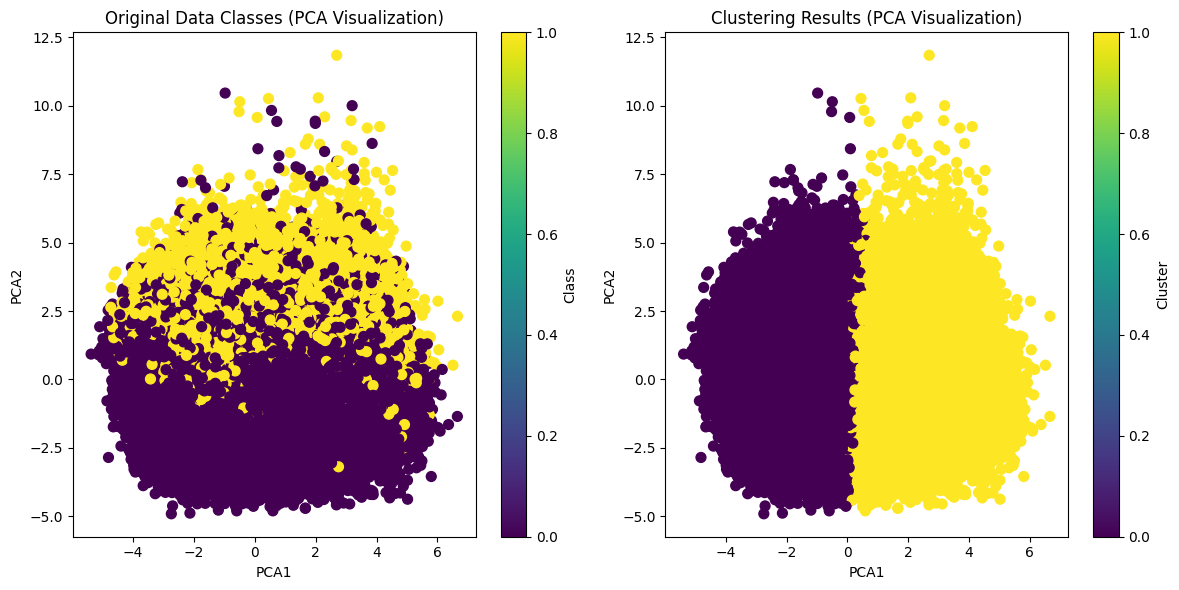

In [50]:
# Step 3: Compare with Original Classes
df_clustering['Actual_Class'] = data_str['RainTomorrow']

# Step 4: Visualize Clusters
# Reduce data to 2 dimensions using PCA
pca = PCA(n_components=5)
pca_data = pca.fit_transform(scaled_data)
df_clustering['PCA1'] = pca_data[:, 0]
df_clustering['PCA2'] = pca_data[:, 1]

# Plot actual classes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_clustering['PCA1'], df_clustering['PCA2'], c=df_clustering['Actual_Class'], cmap='viridis', s=50)
plt.title("Original Data Classes (PCA Visualization)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Class")

# Plot clusters
plt.subplot(1, 2, 2)
plt.scatter(df_clustering['PCA1'], df_clustering['PCA2'], c=df_clustering['Cluster'], cmap='viridis', s=50)
plt.title("Clustering Results (PCA Visualization)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()


In [51]:
# Step 5: Evaluation Metrics
# Calculate ARI and NMI to compare clusters with actual classes
ari_score = adjusted_rand_score(df_clustering['Actual_Class'], df_clustering['Cluster'])
nmi_score = normalized_mutual_info_score(df_clustering['Actual_Class'], df_clustering['Cluster'])

print(f"\nEvaluation Metrics:")
print(f"Adjusted Rand Index (ARI): {ari_score}")
print(f"Normalized Mutual Information (NMI): {nmi_score}")



Evaluation Metrics:
Adjusted Rand Index (ARI): 0.0004912404614396146
Normalized Mutual Information (NMI): 1.1481007379618091e-05
